In [53]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import os
import pickle
from pprint import pprint

In [55]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [56]:
df = pd.read_csv('lg_thinkgq_review_crawling.csv', keep_default_na=False, encoding='cp949') # 크롤링한 엘지 thinq 리뷰 데이터 df란 이름으로 불러오기
df.head() # 앞쪽 데이터 몇 개 보기

,Column1,Review,Star
0,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,3
1,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,1
2,2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,2
3,3,케이블로 tv를 시청중인데 채널변경이 안되네요... Lgtv프로그램도 그렇고... ...,1
4,4,11년차 SW 엔지니어 입니다. 정말 한심하게 보이네요. 업데이트 하고 약관동의 다...,1


In [6]:
len(df) # 리뷰 데이터 갯수 확인

6189

In [7]:
data = df.loc[:,['Review', 'Star']] # df 데이터에서 'Review'와 'Star'열만 data란 이름으로 묶기
data.head() # 앞쪽 데이터 몇 개 보기

,Review,Star
0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,3
1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,1
2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,2
3,케이블로 tv를 시청중인데 채널변경이 안되네요... Lgtv프로그램도 그렇고... ...,1
4,11년차 SW 엔지니어 입니다. 정말 한심하게 보이네요. 업데이트 하고 약관동의 다...,1


In [8]:
emotion = [] # emotion이라는 빈 리스트 만들기
for i, x in enumerate(data['Star']) : # 'Star'가 정수 4이상일 때 emotion에 1, 아닐 때 0 
    if int(x) >= 4 : emotion.append(1)
    else : emotion.append(0)

In [9]:
data['emotion'] = emotion # data에 'emotion'열 추가하고 그 열에는 emotion 리스트 내용이 들어감

In [10]:
data.head() # 앞쪽 데이터 몇 개 보기

,Review,Star,emotion
0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,3,0
1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,1,0
2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,2,0
3,케이블로 tv를 시청중인데 채널변경이 안되네요... Lgtv프로그램도 그렇고... ...,1,0
4,11년차 SW 엔지니어 입니다. 정말 한심하게 보이네요. 업데이트 하고 약관동의 다...,1,0


## Star 긍/부정 나누기

In [11]:
# for i in range(data.shape[0]):
#     data['Star'] = pd.to_numeric(data['Star'])

In [12]:
# emotion_class = []
# for i in range(data.shape[0]):
#     if data['Star'][i] >= 4:
#         emotion_class.append('POS')
#     else:
#         emotion_class.append('NEG')
# data['Star'] = emotion_class 

In [13]:
data.dtypes

Review     object
Star        int64
emotion     int64
dtype: object

In [14]:
data

,Review,Star,emotion
0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,3,0
1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,1,0
2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다. 공기청정기의 예약...,2,0
3,케이블로 tv를 시청중인데 채널변경이 안되네요... Lgtv프로그램도 그렇고... ...,1,0
4,11년차 SW 엔지니어 입니다. 정말 한심하게 보이네요. 업데이트 하고 약관동의 다...,1,0
...,...,...,...
6184,좋아요,5,1
6185,좋네요,5,1
6186,짱좋아요 ♡-♡♡^^,5,1
6187,좋아요~~~,5,1


## 리뷰데이터 전처리

In [15]:
import re 
def preprocessing(text) : # preprocessing이라는 함수 생성
    # 특수문자나 이모티콘 등 제거
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문만 남기고 모두 제거
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    return text

In [16]:
data['Review'] = data['Review'].apply(preprocessing) # data['Review']에 있는 데이터에 preprocessing 함수 적용

In [17]:
data['Review'] = data['Review'].str.lower() # data['Review']에 있는 데이터 모두 소문자로 변환

In [18]:
# 한 의미를 가지는 여러 단어 하나로 통일
data['Review'] = data['Review'].str.replace(
    'tv','티비').str.replace(
    '빨래','세탁').str.replace(
    '핸드폰','폰').str.replace(
    '알람','알림').str.replace(
    '띵큐','씽큐').str.replace(
    'thinq','씽큐').str.replace(
    '띵스','씽큐').str.replace(
    'lg','엘지').str.replace(
    '엘쥐','엘지').str.replace(
    'wifi','와이파이').str.replace(
    '씽큐','씽큐').str.replace(
    'lg스마트씽큐','씽큐').str.replace(
    'iot','아이오티').str.replace(
    'lg think q','씽큐').str.replace(
    'smartthinq','씽큐').str.replace(
    '냄세','냄새').str.replace(
    '헹금','헹굼').str.replace(
    '수줏','수준').str.replace(
    'lte','데이터').str.replace(
    '스케쥴','스케줄').str.replace(
    '강종','강제종료').str.replace(
    '헤제','해제').str.replace(
    '조종','원격제어').str.replace(
    '스마트씽크q앱','씽큐').str.replace(
    'upgrade','업데이트').str.replace(
    'qr','큐알').str.replace(
    '업뎃','업데이트').str.replace(
    '푸쉬','푸시').str.replace(
    'lg styler','스타일러').str.replace(
    '셋팅','세팅').str.replace(
    '에러','오류').str.replace(
    '쵝오','최고').str.replace(
    'good','좋아요').str.replace(
    '좋네요','좋아요').str.replace(
    '굿','좋아요').str.replace(
    '굿굿','좋아요').str.replace(
    '좋습니다','좋아요').str.replace(
    '굿뜨','좋아요').str.replace(
    '좋음','좋아요').str.replace(
    '굳','좋아요').str.replace(
    '좋아용','좋아요').str.replace(
    '굿굿굿','좋아요').str.replace(
    '너뮤','너무').str.replace(
    '에르지','엘지')

In [19]:
data.head(20) # 앞쪽 데이터 몇 개 보기

,Review,Star,emotion
0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,3,0
1,위례 사는 신혼 부부입니다 티비랑 공기청정기는 잘 연동시켰습니다 오래 걸리지도 않았...,1,0
2,샤오미 mi home에만 비교해봐도 아직 기능이 한참 부족합니다 공기청정기의 예약 ...,2,0
3,케이블로 티비를 시청중인데 채널변경이 안되네요 엘지티비프로그램도 그렇고 너무 프로그...,1,0
4,년차 sw 엔지니어 입니다 정말 한심하게 보이네요 업데이트 하고 약관동의 다시 하고...,1,0
5,또 오류 발생했네요 사용횟수가 나오지 않습니다 이메일 보내고 읽으셨던데 답이 없으시...,3,0
6,공기청정기는 컨트롤 기능이 있는데 다른 제품들은 상태만 보이고 컨트롤이 안 되네요 ...,3,0
7,이전글 이번 업데이트 이후 구형 스마트폰인 베가아이언 에서 어풀실행 불가 현상어풀 ...,1,0
8,어느 순간부터 어플 알림이 오지 않네요 와이파이 설정은 정상이며 어플 내 알림 설정...,3,0
9,공기청정기 등록하려고하니 단계 제품연결준비ㅡ제품의 버튼을 초이상눌러 어쩌구 하는 단...,1,0


## 실질형태소 추출

In [20]:
okt = Okt() # Okt 함수 okt로 정의

In [21]:
result = [] # result라는 빈 리스트 생성
# 원소 x가 data['Reviw']에 있을 때, remove_tag에 있는 형태소를 제외하고 tmp리스트에 추가한 후, result에 tmp에 있는 내용 추가
for x in data['Review'] : 
    remove_tag = ['Josa', 'Verb', 'PreEomi', 'Suffix', 'Punctuation', 'Foreign', 'Unknown', 'Hashtag', 'ScreenName', 'Email', 'URL', 'KoreanParticle']
    tmp = [y[0] for y in okt.pos(x, norm = True, stem = True) if y[1] not in remove_tag]
    result.append(tmp)

In [23]:
data['review_token'] = result # data에 'review_token'열 추가하고 그 열에는 result 리스트 내용이 들어감

In [24]:
data['review_token'].head() # data['review_token']열에 있는 앞쪽 데이터 몇 개 확인

0    [인덕션, 제어, 용, 사용, 전용, 건, 좋다, 원, 격, 제어기, 능이, 계속,...
1    [위례, 신혼, 부부, 이다, 티비, 공기청정기, 연동, 오래, 문제, 김치냉장고,...
2    [샤오미, mi, home, 비교, 아직, 기능, 한참, 부족하다, 공기청정기, 예...
3    [케이블, 티비, 시청, 채널, 변경, 안되다, 엘지, 티비, 프로그램, 그렇다, ...
4    [년차, sw, 엔지니어, 이다, 정말, 한심하다, 업데이트, 약관, 동의, 다시,...
Name: review_token, dtype: object

## 불용어 제거

In [25]:
# data['review_token']에 있는 데이터 중 stopwords에 있는 데이터가 아니고 데이터의 길이가 1보다 길면 tmp 리스트에 저장
for i, x in enumerate(data['review_token']) :
    stopwords = ['엘지','삼성','너무','아주', '정말','역시','진짜',
             '매우','세상','지금','어플', '계속','자꾸',
             '일단','자주','아예', '더욱', '좋다','되다','하다','있다','없다',
            '안되다','않다','이렇다','혹시','위함','나마','오지','때문','어쩌고','그냥',
            '그때','오늘','오후','이나','여간','일로','일도','오지','일해','수일','한가지',
            '바로','우리','예전', '최근','어느','거리','써주다','나다','덥다',
            '보이다','도대체','들다','동시','특히','해결','괜찮다','노트', 
            '사용자','주다','하니','많다','한데','그냥','놓다','그리고','때문',
            '나다','그렇다','들다','잘쓰다', '주다','이다','나오다','싶다','두다',
            '같다','아무','가다','사람','개발자','아니다','건지다','보다','받다','다른',
            '자다','해보다','아니다','되어다','이상','건지다','가요','이다','쓸다','같다',
            '스마트폰','많이','나오다','찾다','아무','차다', '정이','가지','이연결', '나름','삼성',
                '보인','이납', '저기', '연결하다','통해','헛소리','요리조리','언제','어디',
                '서나','자유롭다','함께','연결하다', '통해', '요리조리','언제','서나','어디',
                '자유롭다','함께', '어떻다','뭐시기','어찌','간의','상관없다','이후','저만','살짝',
                '무슨','이딴','식인','그래도','빨리','씽스','하나요','부터','기전','이런','이리',
                '거나','된거','조아','아직도','빨리','아든','저만','그렇게','몇번','위해','반드시',
                '야하다','해도','최고','쩔어뇨','마다','저희','쓰레기','수도','거지','용하다','문외한',
                '같이','싱스','널리','건가','라고만',' 조음','수가','에이','라이','차라리','조아','망앱','대체',
                '어떻다','별로','어찌','약간','동안','안해','망하다','간혹','모로','중이','조금','고해',
                '한두','해도','처럼','결국','어디서','등등', '하지만','스럽다','로부터',
                '미치다','어제','제발','여름','하라','마찬가지','되게','거의','가끔','여기',
                '신기하다','이번','아유','어떻','모양','맨날','싱큐','하래','이면','호호','사면',
                '했슴','특헤','오히려','겨우','쓸모','하나','능이','이러니','경우','제일','마냥',
                '뚝뚝','그대로','항상','이미','완전','저녁','오전','려구', '도하', '다만', '가게', '활용',
                '화가','대요', '올해', '한다는', '이렇게','은지', '한심하다', '절대', '옵니다', '오다','오니',
                '대단하다','이따위','산다', '우선', '다가', '만큼','얼마', '드네', '최악', '답답하다','장난',
                '대체로','제대로','먹통','짜증나다','어쩌','개판','나쁘다', '근데', '어떤', '정도', '려고',
                '대한', '방금', '다해','사실', '부탁드리다', '바람', '현재','엄청', '부탁', '좀더','덕분',
                '의미', '대박', '이제', '그것','아직', '엉망', '쓰기','고장', '아무리', '느낌', '시대',
                '잘만', '깜빡', '불안정하다', '요즘', '그런데', '졸라', '씨뱉', '제라', '설치다', '누가',
                '주기도','대로','사기','ap','그거','성공하다', '벌써', '파로', '별하나', '점점', '사고',
                '싫다','라며','생기', '거지같다', '짱짱','고하','심각하다', '충분하다', '인버터', '별루',
                '말르다','괜히','한지','만족하다', '불가하다', '이상하다','아내', '개월','마나', '미래',
                '정확하다','걱정','순간','귀찮다','씨름','제만','세월','드럽다','불안하다','그러면','파이',
                '산지', '더럽다', '산지', '달도', '죄다', '깜박','안함','안좋다','관련','지네','내일', '또는',
                '다른사람','작업','노력', '딱하다', '빡치다', '단위','저번','하든','일부러','짓거리','특정',
                '최소한','힘들다','여전하다', '머리','수건','그나마','돌이','어쩔','라서','피곤하다',
                '얼른','구리다','짜증','힘들다','여전하다','적어도','지난','오류로','정해','또한','그동안',
                '입장','먼저', '그런', '새벽','마음']
    tmp = [y for y in x if y not in stopwords and len(y) > 1]
    # data['review_token']열의 원소를 tmp 리스트로 대체
    data['review_token'][i] = tmp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
data['review_token'] # data['review_token']열 내용 확인

0       [인덕션, 제어, 사용, 전용, 제어기, 이유, 궁금하다, 전원, 제어, 전원, 제...
1       [위례, 신혼, 부부, 티비, 공기청정기, 연동, 오래, 문제, 김치냉장고, 서버,...
2       [샤오미, mi, home, 비교, 기능, 한참, 부족하다, 공기청정기, 예약, 기...
3       [케이블, 티비, 시청, 채널, 변경, 티비, 프로그램, 프로그램, 오류, 투성이,...
4       [년차, sw, 엔지니어, 업데이트, 약관, 동의, 다시, 제품, 등록, 공기청정기...
                              ...                        
6184                                                   []
6185                                                   []
6186                                                   []
6187                                                   []
6188                                                   []
Name: review_token, Length: 6189, dtype: object

In [27]:
# flatten 함수 정의
def flatten(l) :
    flatlist = [] 
    for elem in l :
        if type(elem) == list :
            for e in elem :
                flatlist.append(e)
        else :
            flatlist.append(elem)
    return flatlist

In [28]:
# data['review_token']에 있는 데이터를 리스트로 변환하고 useful로 정의
useful = data['review_token'].tolist() 

In [29]:
# ussful 리스트에 flatten 함수 적용
useful = flatten(useful)

In [30]:
# 불용어 리스트 설정
stopwords = ['엘지', '너무','아주', '정말','역시','진짜',
             '매우','세상','지금','어플', '계속','자꾸',
             '일단','자주','아예', '더욱', '좋다','되다','하다','있다','없다',
            '안되다','않다','이렇다','혹시','위함','나마','오지','때문','어쩌고','그냥',
            '그때','오늘','오후','이나','여간','일로','일도','오지','일해','수일','한가지',
            '바로','우리','예전', '최근','어느','거리']

In [31]:
most = [] # most라는 빈 리스트 생성
# 원소가 useful 안에 있으면서 그 길이가 1보다 크고, stopwords에 포함되지 않을 때 원소를 most 리스트에 추가
for word in useful :
    if len(word) > 1 :
        if word not in stopwords :
            most.append(word)

In [32]:
most[0:10] # most 리스트 10개 확인

['인덕션', '제어', '사용', '전용', '제어기', '이유', '궁금하다', '전원', '제어', '전원']

In [33]:
# 토큰 데이터 nltk로 묶기
import nltk
text = nltk.Text(most, name = 'NMSC')

In [34]:
# 토큰의 갯수 확인
print(len(text.tokens))

30182


## 워드클라우드 생성

In [35]:
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
# 워드클라우드 정의
wordclouds = WordCloud(width = 800, # 가로 크기 800
                      height = 800, # 세로 크기 800
                      background_color = 'Black', # 바탕색 검정색으로 설정
                      colormap = 'Oranges', # 시각화 단어 주황색 사용
                      font_path='Library/Fonts/AppleGothic.ttf') # 폰트 경로 설정

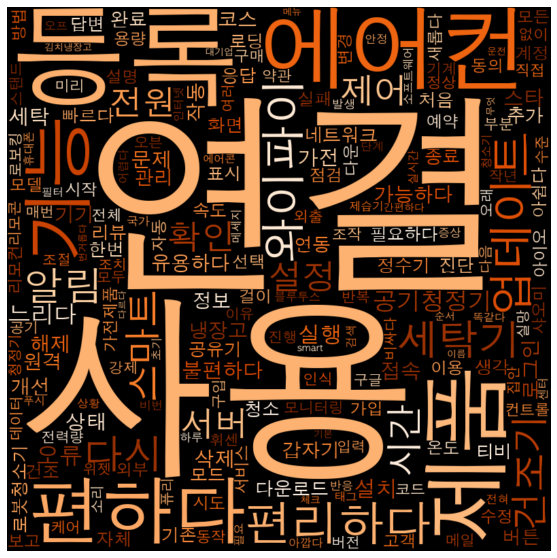

In [36]:
from collections import Counter

count = Counter(text) # text에 있는 단어의 빈도 수 count로 정의
wordclouds = wordclouds.generate_from_frequencies(count) # 미리 정의된 단어의 빈도수를 이용하여 워드클라우드 그림
array = wordclouds.to_array() # wordclouds를 array로 변환한 것을 array라는 이름으로 저장

fig = plt.figure(figsize = (10,10)) # figure 사이즈 설정
plt.imshow(array, interpolation = 'bilinear') # imshow를 사용해 자료의 크기를 색깔로 표시
plt.axis('off') # x, y축에 해당하는 내용 보여주지 않음
plt.show() # 워드클라우드 시각화 결과 보여줌

## LG 긍/부정 나누기

In [37]:
pos = data.loc[(data['emotion'] == 0),:]
neg = data.loc[(data['emotion'] == 1),:]

In [38]:
POS = []
for i in range(len(pos)):
    try:
        POS.append(okt.nouns(pos["Review"][i]))
    except Exception as e:
        continue

In [39]:
NEG = []
for i in range(len(neg)):
    try:
        NEG.append(okt.nouns(neg["Review"][i]))
    except Exception as e:
        continue

In [40]:
# 중첩리뷰를 하나로 만들기

def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [41]:
POS = flatten(POS)
NEG = flatten(NEG)

In [42]:
POS = [x for x in POS if len(x) >1]
NEG = [x for x in NEG if len(x) >1]

### 불용어 처리

In [43]:
stopwords = ['엘지', '너무','아주', '정말','역시','진짜','기능','기기',
             '매우','느낌','세상','지금','사용','기능' '제품', '확인', '상태', 
             '어플', '상태', '계속','자꾸','일단','자주']

for word in POS:
    if word in stopwords:
        while word in POS: POS.remove(word)

In [44]:
stopwords = ['엘지', '너무','아주', '진짜','기능','세상',
             '정말', '제품', '확인', '상태', '계속', 
             '어플', '상태' '불편', '최악','자꾸', '일단']

for word in NEG:
    if word in stopwords:
        while word in NEG: NEG.remove(word)

In [45]:
pd.Series(POS).value_counts().head()

연결      514
에어컨     237
업데이트    225
등록      220
제품      209
dtype: int64

In [46]:
pd.Series(NEG).value_counts().head()

사용     287
알림     119
세탁기    111
건조기    101
연결      95
dtype: int64

## LG 긍정 wordcloud

In [47]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

font_path = 'Library/Fonts/AppleGothic.ttf'
wordclouds = WordCloud(font_path = font_path, width = 800, 
                     height = 800,
                     background_color = 'Black',
                     colormap = 'Oranges')

In [48]:
from collections import Counter
count = Counter(POS)
wordclouds = wordclouds.generate_from_frequencies(count)
array = wordclouds.to_array()

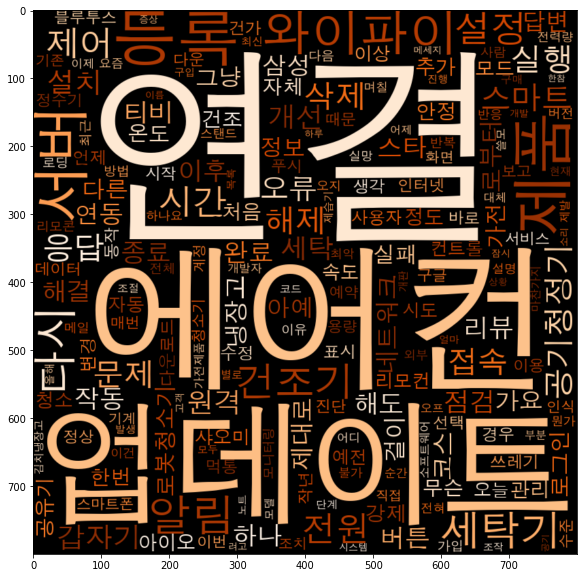

In [49]:
fig = plt.figure(figsize=(10,10)) #figure 사이즈
plt.imshow(array, interpolation = 'bilinear') 
plt.show()

## LG 부정 wordcloud

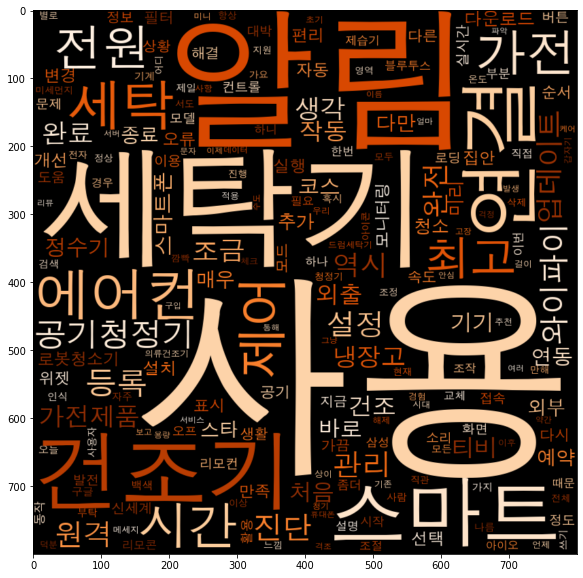

In [50]:
from collections import Counter
count = Counter(NEG)
wordclouds = wordclouds.generate_from_frequencies(count)
array = wordclouds.to_array()

fig = plt.figure(figsize=(10,10)) #figure 사이즈
plt.imshow(array, interpolation = 'bilinear') 
plt.show()

In [51]:
from os import path
# 경로 설정
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# wordcloud로 시각화 된 파일 저장
wordclouds.to_file(path.join(d, 'wordcloud.png'))

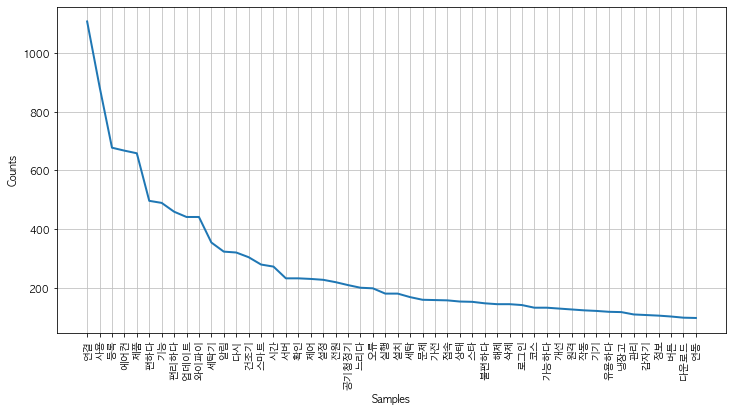

In [57]:
import nltk

plt.figure(figsize=(12,6)) # figure 사이즈 설정
text.plot(50) # 빈도수 상위 50개만
plt.show() # 빈도수 시각화 한 결과 보여줌